# Library for project

Install Library:

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras


In [ ]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:

    * Redistributions of source code must retain the above copyright
       notice, this list of conditions and the following disclaimer.

    * Redistributions in binary form must reproduce the above
       copyright notice, this list of conditions and the following
       disclaimer in the documentation and/or other materials provided
       with the distribution.

    * Neither the name of the NumPy Developers nor the names of any
       contributors may be used to endorse or promote products derived
       from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
!pip show pandas

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

# Tối ưu hoá hàm băm để giảm va chạm trong ứng dụng blockchain


# Load dataset

Mount and clean data from dataset

Mount to drive

In [76]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/dataset/
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/dataset
algorithm  hash_algorithm_dataset.csv  hash_algorithm_model.h5	hash_algorithm_test_dataset.csv


# Xây dựng Model ANN

In [74]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


file_path = "/content/drive/MyDrive/dataset/hash_algorithm_dataset.csv"

# Đọc dataset
df = pd.read_csv(file_path)

# Mã hóa cột "Data Type" thành số
label_encoder = LabelEncoder()
df["Data Type"] = label_encoder.fit_transform(df["Data Type"])

# Chuyển đổi cột "Byte Distribution" từ chuỗi thành mảng số
df["Byte Distribution"] = df["Byte Distribution"].apply(eval)
byte_distribution_cols = pd.DataFrame(df["Byte Distribution"].tolist())
df = pd.concat([df, byte_distribution_cols], axis=1).drop(columns=["Byte Distribution"])

# Mã hóa cột "Optimal Hash Algorithm" thành số
hash_algorithms = ["SHA3-512", "BLAKE3", "SHA-256", "Keccak-256"]
df["Optimal Hash Algorithm"] = df["Optimal Hash Algorithm"].apply(lambda x: hash_algorithms.index(x))

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = df.drop(columns=["Optimal Hash Algorithm"])
y = df["Optimal Hash Algorithm"]

X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng mô hình học sâu
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')  # 4 thuật toán băm
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Độ chính xác mô hình: {accuracy * 100:.2f}%")

# Lưu mô hình
model.save("hash_algorithm_model.h5")
print("✅ Mô hình đã được lưu thành 'hash_algorithm_model.h5'")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8693 - loss: 0.3274 - val_accuracy: 0.9709 - val_loss: 0.0648
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9787 - loss: 0.0521 - val_accuracy: 0.9827 - val_loss: 0.0404
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9832 - loss: 0.0392 - val_accuracy: 0.9847 - val_loss: 0.0349
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9858 - loss: 0.0339 - val_accuracy: 0.9854 - val_loss: 0.0337
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9870 - loss: 0.0296 - val_accuracy: 0.9862 - val_loss: 0.0304
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9885 - loss: 0.0279 - val_accuracy: 0.9856 - val_loss: 0.0340
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9889 - loss: 0.0263 - val_accuracy: 0.9851 - val_loss: 0.0335
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9897 - loss: 0.0247 - val_accur

✅ Độ chính xác mô hình: 99.28%
✅ Mô hình đã được lưu thành 'hash_algorithm_model.h5'


# Dự đoán hàm băm tối ưu

In [60]:
import numpy as np

# Load mô hình đã lưu
model = keras.models.load_model("/content/drive/MyDrive/dataset/hash_algorithm_model.h5")

# Dữ liệu đầu vào mới
new_data = np.array([[512, 4.5, 0.2, 0.75, 0.0001] + [0.1] * 10])

# Chuẩn hóa dữ liệu
new_data = scaler.transform(new_data)

# Dự đoán thuật toán băm tốt nhất
predicted = model.predict(new_data)
hash_algorithm = hash_algorithms[np.argmax(predicted)]

print("🔹 Thuật toán băm được gợi ý:", hash_algorithm)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
🔹 Thuật toán băm được gợi ý: Keccak-256


Thông số của mô hình.

In [71]:
import tensorflow as tf

# Đọc file CSV
df_test = pd.read_csv("hash_algorithm_test_dataset.csv")

# Load mô hình đã huấn luyện
model_path = "/content/drive/MyDrive/dataset/hash_algorithm_model.h5"
model = tf.keras.models.load_model(model_path)

# Kiểm tra kiểu dữ liệu của cột "Byte Distribution"
print(df_test["Byte Distribution"].dtype)  # Nếu là 'object', có thể chứa string

print(df_test["Data Type"])

# Chuẩn bị dữ liệu đầu vào
X_test = df_test.drop(columns=["Optimal Hash Algorithm"])

print(type(X_test))  # Kiểm tra kiểu dữ liệu tổng thể
print(isinstance(X_test, np.ndarray))  # Xem có phải mảng NumPy không
print(isinstance(X_test, list))  # Xem có phải danh sách không
print(X_test[:5])  # In 5 dòng đầu để kiểm tra nội dung

model.summary()

print("X_test shape:", X_test.shape)



object
0       Random Bytes
1      Blockchain TX
2               JSON
3              Image
4               Text
           ...      
995             JSON
996            Image
997             Text
998            Image
999     Random Bytes
Name: Data Type, Length: 1000, dtype: object
<class 'pandas.core.frame.DataFrame'>
False
False
       Data Type  Data Size (Bytes)   Entropy  \
0   Random Bytes               2048  7.912037   
1  Blockchain TX               8192  7.977875   
2           JSON                512  4.356312   
3          Image               4096  7.958004   
4           Text               4096  3.998965   

                                   Byte Distribution  Complexity Score  
0  [0.005859375, 0.00537109375, 0.00390625, 0.003...          1.000000  
1  [0.0030517578125, 0.0032958984375, 0.003784179...          1.000000  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          0.272269  
3  [0.005126953125, 0.003662109375, 0.00366210937...          1.000000  
4  [0.0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,446 (21.28 KB)

 Trainable params: 5,444 (21.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

X_test shape: (1000, 5)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
📊 Báo cáo đánh giá mô hình:
              precision    recall  f1-score   support

    SHA3-512       0.96      0.98      0.97        48
      BLAKE3       0.80      1.00      0.89         4
     SHA-256       1.00      0.83      0.91        24
  Keccak-256       0.88      0.96      0.92        24

    accuracy                           0.94       100
   macro avg       0.91      0.94      0.92       100
weighted avg       0.94      0.94      0.94       100



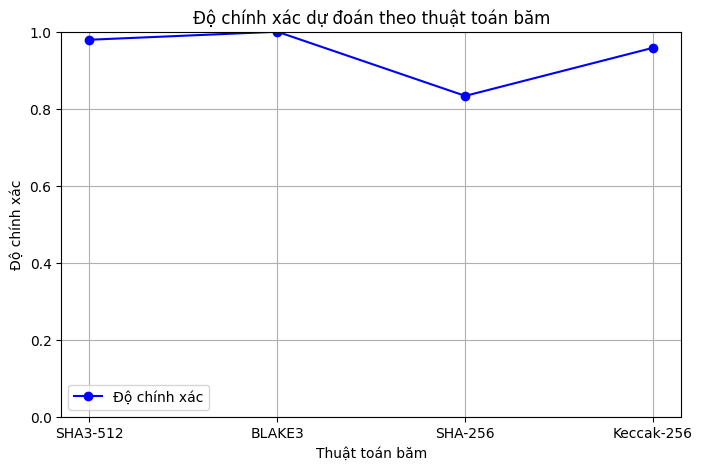

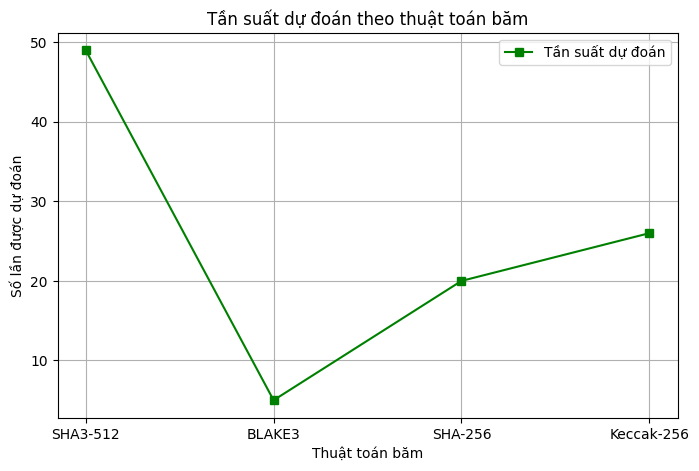

In [83]:
# Test model
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.metrics import classification_report, confusion_matrix

# Load mô hình đã huấn luyện
model_path = "/content/drive/MyDrive/dataset/hash_algorithm_model.h5"
model = tf.keras.models.load_model(model_path)

# Load tập kiểm tra
test_data_path = "/content/drive/MyDrive/dataset/hash_algorithm_test_dataset.csv"
df_test = pd.read_csv(test_data_path)

df_test["Byte Distribution"] = df_test["Byte Distribution"].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Mã hóa cột "Optimal Hash Algorithm" thành số
hash_algorithms = ["SHA3-512", "BLAKE3", "SHA-256", "Keccak-256"]
df_test["Optimal Hash Algorithm"] = df_test["Optimal Hash Algorithm"].apply(lambda x: hash_algorithms.index(x))

# Mã hóa cột "Datatype" thành số
data_type = ["Random Bytes", "Blockchain TX", "JSON", "Image", "Text"]
df_test["Data Type"] = df_test["Data Type"].apply(lambda x: data_type.index(x) if x in data_type else -1)


# Chuẩn bị dữ liệu đầu vào
X_test = df_test.drop(columns=["Optimal Hash Algorithm"])
y_test = df_test["Optimal Hash Algorithm"]

X_test["Byte Distribution"] = X_test["Byte Distribution"].apply(lambda x: np.array(x) if isinstance(x, list) else np.zeros(256))

byte_distribution_expanded = pd.DataFrame(X_test["Byte Distribution"].to_list(), index=X_test.index)
X_test = X_test.drop(columns=["Byte Distribution"]).join(byte_distribution_expanded)

X_test.columns = X_test.columns.astype(str)

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Dự đoán trên tập kiểm tra
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# In báo cáo hiệu suất
print("📊 Báo cáo đánh giá mô hình:")
print(classification_report(y_test, y_pred, target_names=["SHA3-512", "BLAKE3", "SHA-256", "Keccak-256"]))

# Biểu đồ "Độ chính xác dự đoán theo thuật toán băm"
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Tính số lượng mẫu đúng trên tổng số mẫu của mỗi thuật toán
accuracy_per_class = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Vẽ biểu đồ đường
plt.figure(figsize=(8, 5))
plt.plot(hash_algorithms, accuracy_per_class, marker='o', linestyle='-', color='b', label="Độ chính xác")

# Định dạng biểu đồ
plt.xlabel("Thuật toán băm")
plt.ylabel("Độ chính xác")
plt.title("Độ chính xác dự đoán theo thuật toán băm")
plt.ylim(0, 1)  # Giá trị trong khoảng 0-1
plt.grid(True)
plt.legend()
plt.show()

# Biểu đồ "Tần suất dự đoán theo thuật toán băm"
import collections

# Đếm số lượng dự đoán mỗi thuật toán
pred_counts = collections.Counter(y_pred)

# Chuyển đổi thành danh sách theo thứ tự thuật toán băm
pred_frequencies = [pred_counts[i] for i in range(len(hash_algorithms))]

# Vẽ biểu đồ đường
plt.figure(figsize=(8, 5))
plt.plot(hash_algorithms, pred_frequencies, marker='s', linestyle='-', color='g', label="Tần suất dự đoán")

# Định dạng biểu đồ
plt.xlabel("Thuật toán băm")
plt.ylabel("Số lần được dự đoán")
plt.title("Tần suất dự đoán theo thuật toán băm")
plt.grid(True)
plt.legend()
plt.show()
